In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import os
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

BATCH_LABELS = ("S1", "S2")

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.19 numpy==1.16.3 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
batches = {}

for batch in BATCH_LABELS:
    filename = "tgfb1-4-" + batch + ".h5ad"
    filename = os.path.join("write", filename)
    batches[batch] = anndata.read(filename)

batches

{'S1': AnnData object with n_obs × n_vars = 5019 × 7176 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature'
     var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'batch_colors', 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'ambiguous', 'spliced', 'unspliced',
 'S2': AnnData object with n_obs × n_vars = 7047 × 7176 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature'
     var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'batch_colors', 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'ambiguous', 'spliced

In [3]:
for matrix in batches.values():
    scv.tl.velocity(matrix, mode='stochastic')
    scv.tl.velocity_graph(matrix)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:05.76) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:05.39) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
computing velocities
    finished (0:00:03.26) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:04.08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:03.20) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:07.17) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
co

In [4]:
for matrix in batches.values():
    scv.tl.velocity_embedding(matrix, basis='umap')

computing velocity embedding
    finished (0:00:01.32) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01.92) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


<Figure size 432x288 with 0 Axes>

now plotting for batch S1


<Figure size 432x288 with 0 Axes>

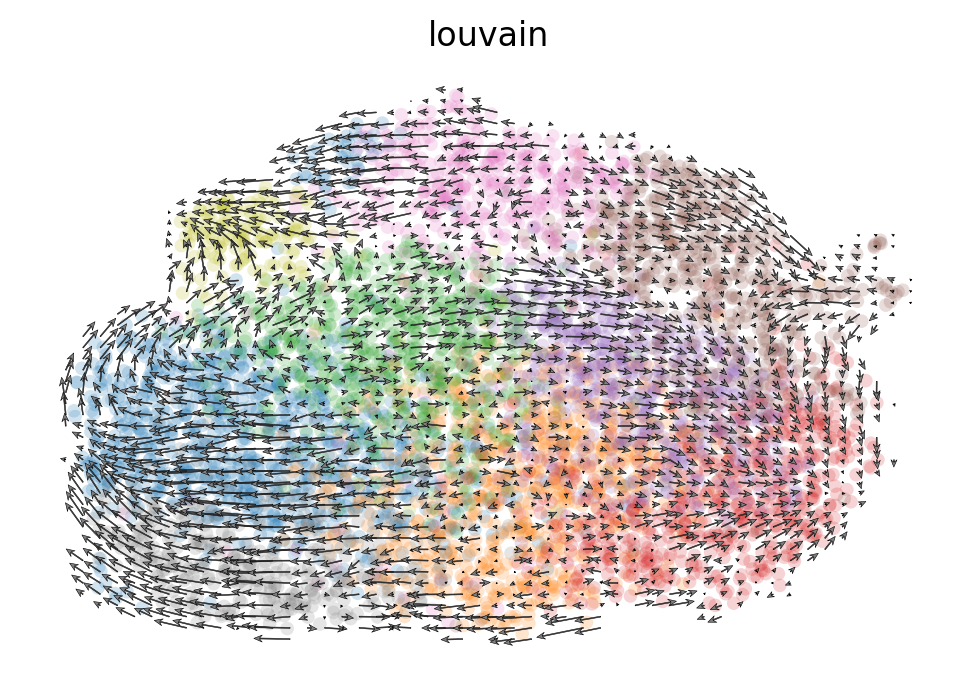

now plotting for batch S2


<Figure size 432x288 with 0 Axes>

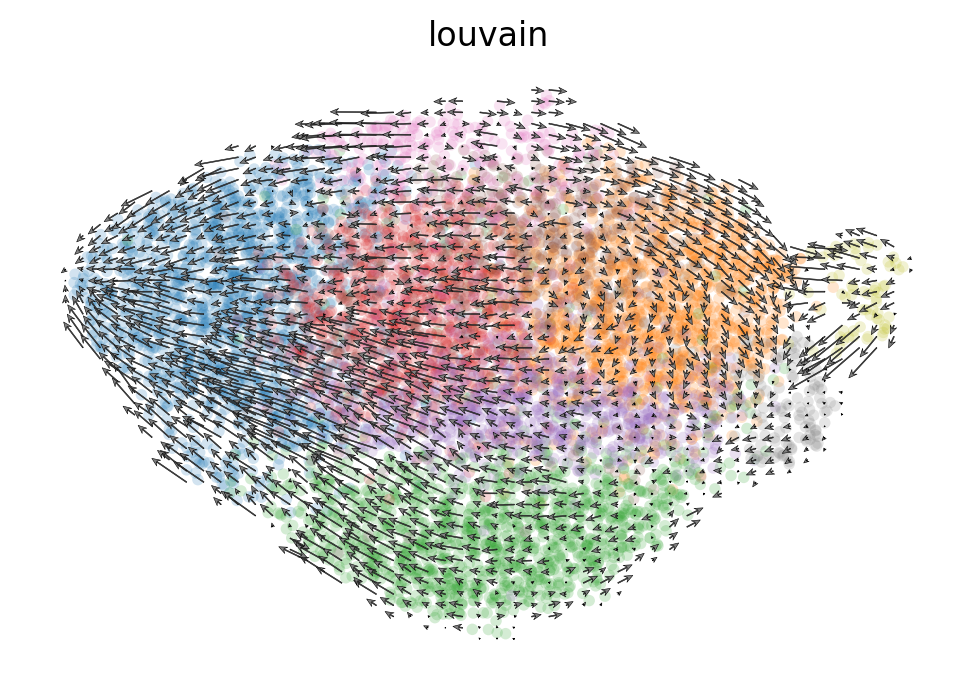

In [5]:
for batch, matrix in batches.items():
    print("now plotting for batch", batch)
    scv.pl.velocity_embedding_grid(matrix, basis='umap', arrow_length=4, arrow_size=1.5, dpi=200)

now plotting for batch S1


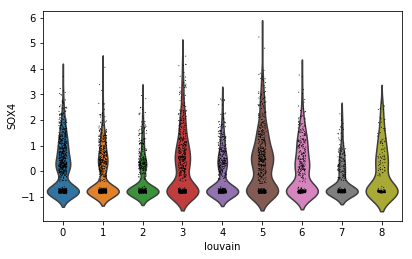

now plotting for batch S2


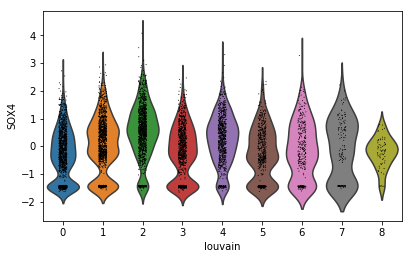

In [6]:
for batch, matrix in batches.items():
    print("now plotting for batch", batch)
    try:
        sc.pl.violin(matrix, ["SOX4"], groupby='louvain')
    except:
        print("not found")

In [7]:
for batch, matrix in batches.items():
    filename = "tgfb1-5-" + batch + ".h5ad"
    filename = os.path.join("write", filename)
    matrix.write(filename)